# Module 3 Exercise 1 - A time series analysis of positive influenza tests from 1998 to 2019

## Overview
In this exercise, you will perform a time series analysis on verified influenza infection rates in the United States between 1998 and 2019.

## File Format

The data are located in the resources subfolder of module 3, in a file named `positive-influenza-specimens-1998-2019.csv`.

Documentation on the dataset is [here](../resources/positive-influenza-specimens-1998-2019.txt).

## Required Output
Along with the output of this notebook, you will respond to the questions located in the Quiz for this exercise in the Canvas site for this course.
        
## Grading
There are two parts to submission of this exercise. The first is submission of this notebook, and is worth 49 points. Not submitting code will result in a loss of 49 points. Submitting code that is not functional will result in a loss of 25 points.  

There are a number of plots required to be created in the notebook.  Each plot that is required has a point total next to it.  There are 39 total points for plots.  Plots will be assessed for correctness, but not style. An incorrect plot will be counted for half the available points.  A missing plot will be counted for no points.

The second part of the exercise is submission of the answers via the associated Canvas quiz. Each correct answer on the Canvas Quiz is worth 2 points.

Any numeric answer typed into Canvas will be considered correct if it is within $\pm$ 1% from the reference answer.  Answers in which you select a given choice will be graded based on the identified correct choice(s).  For multi-select, partial credit is given if a portion of the correct answers are selected.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install --upgrade "statsmodels==0.11"

     |████████████████████████████████| 8.7MB 2.3MB/s eta 0:00:01
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [3]:
plt.rcParams["figure.figsize"] = [10, 5]

## Load the data

In [4]:
# your code here

data = pd.read_csv('../resources/positive-influenza-specimens-1998-2019.csv')

display(data.head(15))

,Year,Week,Age Group,A (H1),A (Unable to Subtype),A (H3),A (H1N1)pdm09,A (Subtyping not Performed),B (Victoria Lineage),B (Yamagata Lineage),B (Lineage Unspecified),H3N2v
0,1998,1,0-4 yr,0,0,25,0,11,0,0,0,0
1,1998,2,0-4 yr,0,0,37,0,8,0,0,0,0
2,1998,3,0-4 yr,0,0,78,0,18,0,0,0,0
3,1998,4,0-4 yr,0,0,80,0,26,0,0,0,0
4,1998,5,0-4 yr,0,0,68,0,22,0,0,0,0
5,1998,6,0-4 yr,1,0,60,0,19,0,0,1,0
6,1998,7,0-4 yr,0,0,26,0,2,0,0,0,0
7,1998,8,0-4 yr,0,0,15,0,5,0,0,0,0
8,1998,9,0-4 yr,0,0,11,0,2,0,0,0,0
9,1998,10,0-4 yr,0,0,9,0,1,0,0,1,0


## Aggregate the influenza type A data into a summary column
We will study the type A counts only in this exercise.  The type A counts we will use are in columns 3-7 and 11.  Create a new column that aggregates all of these type A counts.

In [5]:
# your code here

cols_to_sum = ['A (H1)', 'A (Unable to Subtype)', 'A (H3)', 'A (H1N1)pdm09', 'A (Subtyping not Performed)', 'H3N2v']
data['A Count'] = data[cols_to_sum].sum(axis = 1)

# data['A Count'] = data['A (H1)'] + data['A (Unable to Subtype)'] + data['A (H3)'] + data['A (H1N1)pdm09']
# + data['A (Subtyping not Performed)'] + data['H3N2v']
    
display(data.head(15))

,Year,Week,Age Group,A (H1),A (Unable to Subtype),A (H3),A (H1N1)pdm09,A (Subtyping not Performed),B (Victoria Lineage),B (Yamagata Lineage),B (Lineage Unspecified),H3N2v,A Count
0,1998,1,0-4 yr,0,0,25,0,11,0,0,0,0,36
1,1998,2,0-4 yr,0,0,37,0,8,0,0,0,0,45
2,1998,3,0-4 yr,0,0,78,0,18,0,0,0,0,96
3,1998,4,0-4 yr,0,0,80,0,26,0,0,0,0,106
4,1998,5,0-4 yr,0,0,68,0,22,0,0,0,0,90
5,1998,6,0-4 yr,1,0,60,0,19,0,0,1,0,80
6,1998,7,0-4 yr,0,0,26,0,2,0,0,0,0,28
7,1998,8,0-4 yr,0,0,15,0,5,0,0,0,0,20
8,1998,9,0-4 yr,0,0,11,0,2,0,0,0,0,13
9,1998,10,0-4 yr,0,0,9,0,1,0,0,1,0,10


## Group by Year and Week
Sum the Type A count across all age groups for each year and week into a dataframe containing year, week, and type A count.

In [6]:
# your code here

# weekly_data = data.groupby(['Year', 'Week']).agg({'A Count': 'sum'})

weekly_data = pd.DataFrame(data.groupby(by=['Year', 'Week'])['A Count'].sum())

display(weekly_data.head(15))

A Count
Year Week         
1998 1         255
     2         318
     3         551
     4         634
     5         528
     6         442
     7         284
     8         154
     9         111
     10         97
     11         54
     12         21
     13         18
     14         20
     15         19

## Plot the data
1. Create a line plot of influenza A counts by the index. **(5 points)**
1. Create a boxplot of influenza A counts by year. **(5 points)**

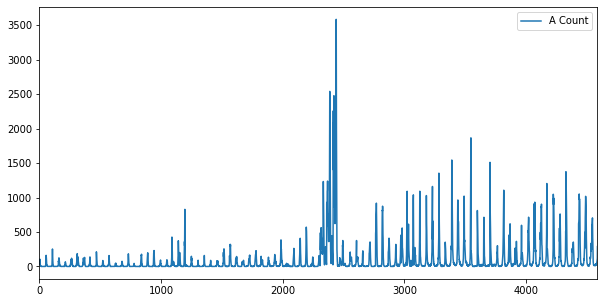

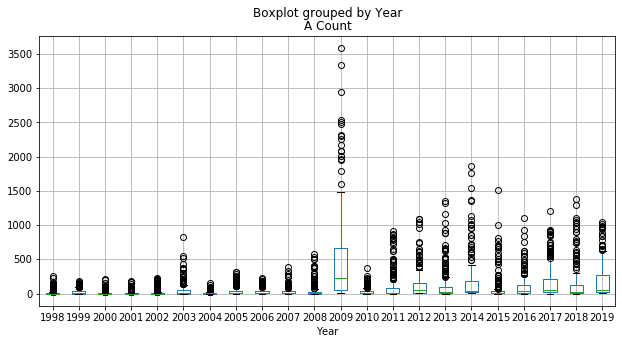

In [7]:
# your code here

ax = data.plot(y='A Count')
plt.show()

data.boxplot('A Count', 'Year')

## Remove the data for the outlier year
One year has a much higher mean positive test count.  It should be removed prior to conducting a time series analysis.  Because you are removing an entire year from the time series, a datetime cannot be used as the dataframe index.  Instead, recreate the index to be a consecutive integer, starting from the oldest year and week to the newest year and week, without any holes in the numeric sequence.

1. Replot the line chart of influenza A counts by the index. **(5 points)**

In [8]:
# your code here

grouped_data = weekly_data.reset_index().sort_values(['Year', 'Week'], ascending=True)
grouped_data = grouped_data.loc[grouped_data['Year'] != 2009]
display(grouped_data)
grouped_data.loc[grouped_data['Year']==2009]



,Year,Week,A Count
0,1998,1,255
1,1998,2,318
2,1998,3,551
3,1998,4,634
4,1998,5,528
...,...,...,...
1142,2019,48,483
1143,2019,49,574
1144,2019,50,662
1145,2019,51,899


,Year,Week,A Count


In [9]:
yearly_data = grouped_data.sort_values(by=['Year', 'Week']).groupby(['Year']).agg({'A Count': ['count', 'sum']})

yearly_data

A Count       
       count    sum
Year               
1998      52   3661
1999      52   5209
2000      52   2590
2001      52   2205
2002      52   4721
2003      53  10928
2004      52   1944
2005      52   7113
2006      52   6162
2007      52   6701
2008      52  10118
2010      52   6775
2011      52  21997
2012      52  27501
2013      52  24268
2014      53  37761
2015      52  16737
2016      52  22001
2017      52  34926
2018      52  29116
2019      52  39424

## Checkpoint

Run a count and sum of the influenze type A counts by year of the data.  You should have this:

```
	A
	count 	sum
Year 		
1998 	52 	3661
1999 	52 	5209
2000 	52 	2590
2001 	52 	2205
2002 	52 	4721
2003 	53 	10928
2004 	52 	1944
2005 	52 	7113
2006 	52 	6162
2007 	52 	6701
2008 	52 	10118
2010 	52 	6775
2011 	52 	21997
2012 	52 	27501
2013 	52 	24268
2014 	53 	37761
2015 	52 	16737
2016 	52 	22001
2017 	52 	34926
2018 	52 	29116
2019 	52 	39424```

Ensure your data is sorted by year and week.

If these are not the case, correct your code before proceeding.

In [10]:
# your code here

# dates = grouped_data.Year*100+grouped_data.Week
# grouped_data['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

# grouped_data = grouped_data.set_index('date')

## Run a timeseries decomposition on the data

1. Plot the three components: Trend, Seasonal, and Residual **(5 points)**

Use a period of 52.  Because some years have data with 53 weeks, this is not ideal, but more years have only 52 weeks so this is the best compromise.

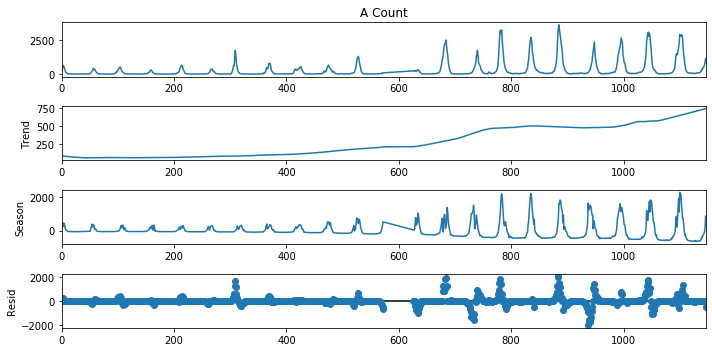

In [11]:
# your code here

from statsmodels.tsa.seasonal import STL
decomp_result = STL(grouped_data['A Count'], period=52, robust=True).fit()
decomp_result.plot()
plt.show()

In [12]:
decomp_result.trend

0        79.933927
1        79.205332
2        78.480108
3        77.758403
4        77.040365
           ...    
1142    734.597679
1143    736.725114
1144    738.856142
1145    740.990695
1146    743.128690
Name: trend, Length: 1094, dtype: float64

## Create lag_plots
1. Plot from lag 1 through 4, using just the trend data from the decomposition. **(4 points)**

## Quiz 1 Question 1

Based on the lag plots, the trend data appear to be auto correlated.

A. True

B. False

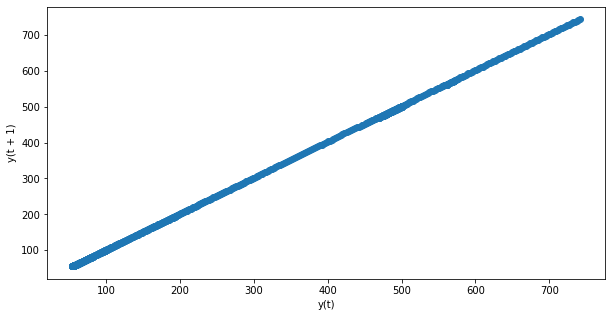

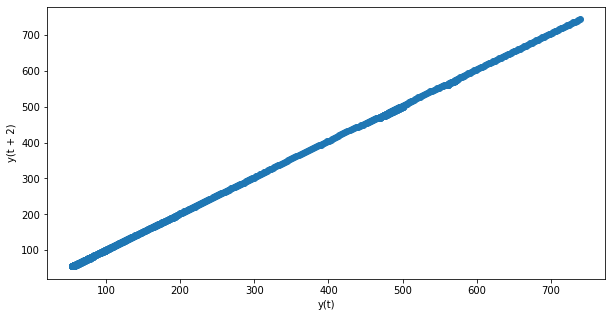

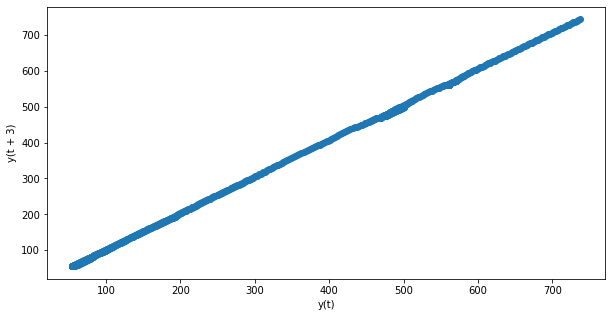

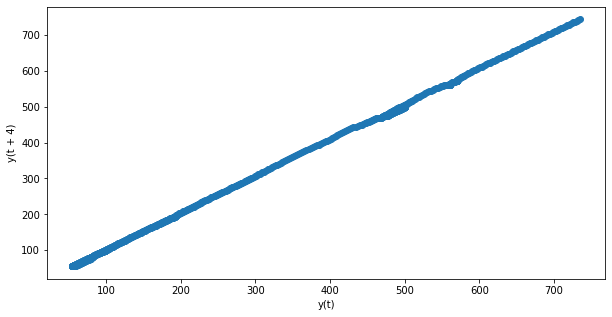

In [13]:
# your code here

from pandas.plotting import lag_plot

lag_plot(decomp_result.trend, lag=1)
plt.show()
lag_plot(decomp_result.trend, lag=2)
plt.show()
lag_plot(decomp_result.trend, lag=3)
plt.show()
lag_plot(decomp_result.trend, lag=4)
plt.show()

# Test the stationarity of the trend component
Use the ADF test.

## Quiz 1 Question 2
What is the Null Hypothesis for the Augmented Dickey Fuller test?

## Quiz 1 Question 3
Is the trend component of the decomposed time series data stationary?


In [14]:
# your code here

from statsmodels.tsa.stattools import adfuller

result = adfuller(decomp_result.trend.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# It is non-stationary

ADF Statistic: 0.8254129341347667
p-value: 0.9920355007880616


In [15]:
diff_trend = decomp_result.trend.diff()

result = adfuller(diff_trend.dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.176640421440118
p-value: 0.21483259814208527


In [16]:
diff_trend = decomp_result.trend.diff().diff()

result = adfuller(diff_trend.dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -10.315389378486126
p-value: 3.1070084359681894e-18


## Find the smallest order of difference that resolves the trend data's non-stationarity

Run successive ADF tests until you find a signficant result at $\alpha$ = 0.05

## Quiz 1 Question 4
What is the smallest order of diff that causes the trend data to pass the ADF test at $\alpha$ = 0.05?

## Create an ACF plot for the diff order found that creates a stationary trend data set

1. Create an ACF plot of the trend data using the minimum diff that creates stationarity.  Plot 100 lags only. **(5 points)**

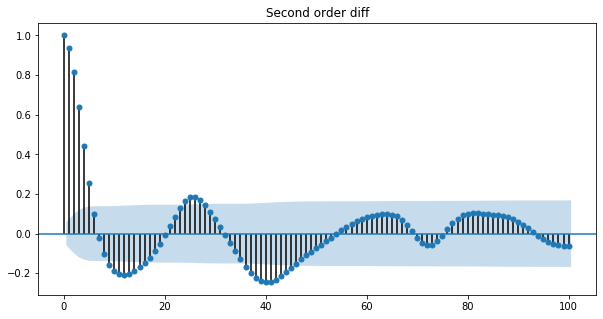

In [17]:
# your code here

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(decomp_result.trend.diff().diff().dropna(), title='Second order diff', lags=100)
plt.show()

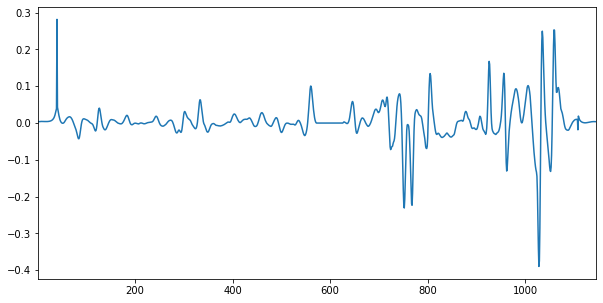

In [18]:
decomp_result.trend.diff().diff().dropna().plot()

## Fitting an ARIMA model

For the remainder of the exercise, only the trend data from the timeseries decomposition will be used for modeling.

## Find the AR term for the ARIMA model

Create a PACF plot and choose a value for "p".


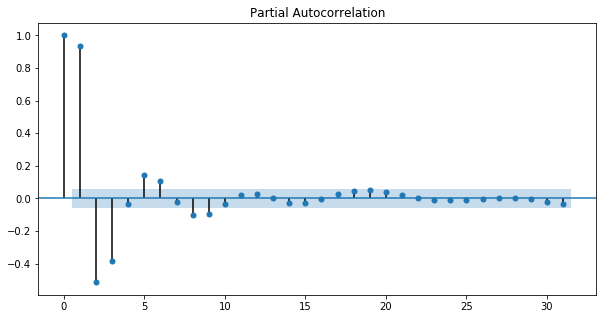

In [19]:
# your code here

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(decomp_result.trend.diff().diff().dropna())
plt.show()

# estimated AR term is 5

## Find the MA term for the ARIMA model

Create an ACF plot and choose a value for "q".

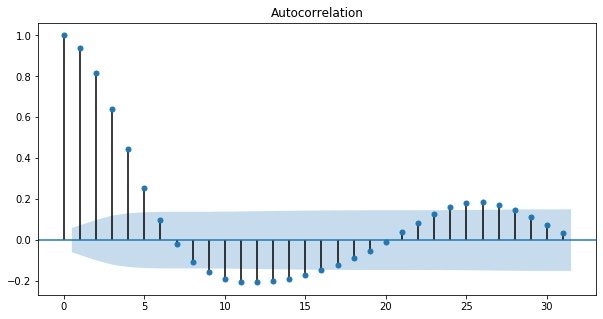

In [20]:
# your code here

plot_acf(decomp_result.trend.diff().diff().dropna())
plt.show()

# estimated MA term is 7

## Build the ARIMA model
Use the parameters you have determined above.  Print the summary of the model fit.

In [21]:
# your code here

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(decomp_result.trend, order=(5,2,7))
fit = model.fit()
print(fit.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.trend   No. Observations:                 1092
Model:                 ARIMA(5, 2, 7)   Log Likelihood                3102.292
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sun, 06 Feb 2022   AIC                          -6176.585
Time:                        18:45:33   BIC                          -6106.644
Sample:                             2   HQIC                         -6150.116
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.001      2.482      0.013       0.000       0.003
ar.L1.D2.trend     3.7585      0.011    341.842      0.000       3.737       3.780
ar.L2.D2.trend    -6.2426      0.021

## Cross validation of model results

Create a train/test split of 67/33.  Re-fit the model using the training data.  

Because the starting parameters resulted in a failure to converge, we will use an order of (2,2,6) for this model.  Print the summary.

In [24]:
# your code here

import math
print('data length', len(decomp_result.trend))
cut_point = math.trunc(len(decomp_result.trend)*0.67)
train = decomp_result.trend[:cut_point]
test = decomp_result.trend[cut_point:]

print('training data min, max:', train.index.min(), train.index.max())
print('testing data min, max: ', test.index.min(), test.index.max())

model = ARIMA(train, order=(2, 2, 6)) 
fit = model.fit(disp=-1)
print(fit.summary())

data length 1094
training data min, max: 0 784
testing data min, max:  785 1146


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.trend   No. Observations:                  730
Model:                 ARIMA(2, 2, 6)   Log Likelihood                2078.579
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sun, 06 Feb 2022   AIC                          -4137.158
Time:                        18:52:00   BIC                          -4091.227
Sample:                             2   HQIC                         -4119.437
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.003      0.531      0.595      -0.005       0.008
ar.L1.D2.trend     1.6276      0.074     22.136      0.000       1.483       1.772
ar.L2.D2.trend    -0.7298      0.064

# Plot the predicted versus actual 

1. Plot the predicted values from the above model against the actual values using the test data set. **(5 points)**

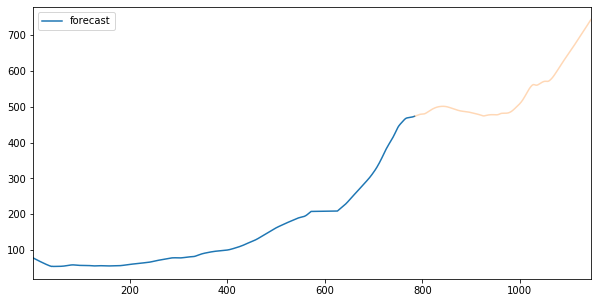

In [32]:
# your code here

fig = fit.plot_predict(plot_insample=False)
decomp_result.trend.loc[test.index.min():].plot(fig=fig, alpha=0.3)
plt.show()

## Calculate MAPE and the correlation
Use $\alpha$ = 0.05 for the forecast. Calculate to 3 decimal places.

## Quiz 1 Question 5
What is the MAPE for the model fitted with order=(2,2,6)?

## Quiz 1 Question 6
What is the Correlation between predicted and actual values for the model fitted with order=(2,2,6)?


In [33]:
# your code here

def mape(predicted, data):
    return np.mean(np.abs(predicted - data)/np.abs(data))

def corr(predicted, data):
    return np.corrcoef(predicted, data)[0,1] 

num_observations = len(test)
predicted, se, conf = fit.forecast(num_observations, alpha=0.05)

display(pd.DataFrame(np.vstack([test[:num_observations], predicted])).T)

print('MAPE:   ', mape(predicted, test[:num_observations]))
print('Corr:   ', corr(predicted, test[:num_observations]))

,0,1
0,473.485129,473.482103
1,473.989488,473.978630
2,474.509497,474.485601
3,475.039934,474.999945
4,475.573076,475.518921
...,...,...
357,734.597679,759.016164
358,736.725114,760.116829
359,738.856142,761.219176
360,740.990695,762.323205


MAPE:    0.11874242207365172
Corr:    0.884088809286313


## Fit another model
Re-fit the model using the training data.  

Use an order of (2,2,4) for this model.  Print the summary.

In [34]:
# your code here

model = ARIMA(train, order=(2, 2, 4)) 
fit = model.fit(disp=-1)
print(fit.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.trend   No. Observations:                  730
Model:                 ARIMA(2, 2, 4)   Log Likelihood                2078.445
Method:                       css-mle   S.D. of innovations              0.014
Date:                Sun, 06 Feb 2022   AIC                          -4140.889
Time:                        19:10:21   BIC                          -4104.145
Sample:                             2   HQIC                         -4126.713
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.003      0.528      0.597      -0.005       0.008
ar.L1.D2.trend     1.6251      0.074     22.048      0.000       1.481       1.770
ar.L2.D2.trend    -0.7206      0.062

# Plot the predicted versus actual 

1. Plot the predicted values from the above model against the actual values using the test data set. **(5 points)**

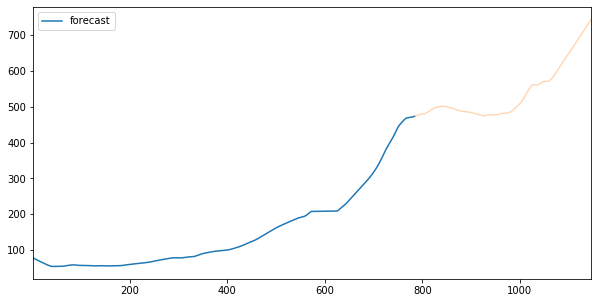

In [35]:
# your code here

fig = fit.plot_predict(plot_insample=False)
decomp_result.trend.loc[test.index.min():].plot(fig=fig, alpha=0.3)
plt.show()

## Calculate MAPE and the correlation
Use $\alpha$ = 0.05 for the forecast.  Calculate to 3 decimal places.

## Quiz 1 Question 7
What is the MAPE for the model fitted with order=(2,2,4)?

## Quiz 1 Question 8
What is the Correlation between predicted and actual values for the model fitted with order=(2,2,4)?


In [36]:
# your code here

num_observations = len(test)
predicted, se, conf = fit.forecast(num_observations, alpha=0.05)

display(pd.DataFrame(np.vstack([test[:num_observations], predicted])).T)

print('MAPE:   ', mape(predicted, test[:num_observations]))
print('Corr:   ', corr(predicted, test[:num_observations]))

,0,1
0,473.485129,473.481772
1,473.989488,473.977521
2,474.509497,474.483202
3,475.039934,474.995729
4,475.573076,475.512383
...,...,...
357,734.597679,757.062223
358,736.725114,758.156263
359,738.856142,759.251978
360,740.990695,760.349368


MAPE:    0.11715742400749213
Corr:    0.8842228718289725


## Quiz 1 Question 8
Based on the MAPE scores for each model, which model is better?

A. (2,2,6)

B. (2,2,4)

C. They are equivalent
